<div style="background-image: url('https://specials-images.forbesimg.com/imageserve/5e7df71b08eb080006520247/960x0.jpg?fit=scale');
background-size: 100% 100%;
font-size: 30px">
<strong><br>CREDIT CARD SPEND<br><br>PREDICTING  &<br><br>IDENTIFYING<br><br>KEY  DRIVERS<br><br><br></strong>
</div>

##  BUISNESS CONTEXT:
One of the global banks would like to understand top driving factors of credit card spend are and they intend to use these insights to calculate credit limit. 

In order to solve the problem, the bank conducted survey of 5000 customers and collected data. 

##  OBJECTIVE:
The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants

##  DATA AVAILABILITY:
* Data for the case are available in **.xlsx** format.The data have been provided for **5000 customers**.
* Detailed data dictionary has been provided for understanding the data in the data in **.csv** format
* Data is encoded in the numerical format to reduce the size of the data however some of the variables are categorical. You can find the details in the data dictionary

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
Importing necessary Libraries
<br><br></strong></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [5]:
#writer = pd.ExcelWriter('Regression Output.xlsx')

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
Importing Credit Card  Dataset
<br><br></strong></div>

In [3]:
import os
os.chdir("C:\\Users\\user\\Desktop\\Alab_Python\\Final Projects in Python\\1. Predicting Credit Card Spend & Identifying Key Drivers")

In [4]:
credit=pd.read_excel("Data Set.xlsx")
credit.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0


In [5]:
print('\nCredit Card Data Shape: ',credit.shape)


Credit Card Data Shape:  (5000, 130)


In [6]:
print('-'*45)
print("Data Information:")
print('-'*45)
credit.info()

---------------------------------------------
Data Information:
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [7]:
print('-'*50)
print("\tColumns of the dataset")
print('-'*50)
#", ".join(credit.columns)
for x in credit.columns: print(x)

--------------------------------------------------
	Columns of the dataset
--------------------------------------------------
custid
region
townsize
gender
age
agecat
birthmonth
ed
edcat
jobcat
union
employ
empcat
retire
income
lninc
inccat
debtinc
creddebt
lncreddebt
othdebt
lnothdebt
default
jobsat
marital
spoused
spousedcat
reside
pets
pets_cats
pets_dogs
pets_birds
pets_reptiles
pets_small
pets_saltfish
pets_freshfish
homeown
hometype
address
addresscat
cars
carown
cartype
carvalue
carcatvalue
carbought
carbuy
commute
commutecat
commutetime
commutecar
commutemotorcycle
commutecarpool
commutebus
commuterail
commutepublic
commutebike
commutewalk
commutenonmotor
telecommute
reason
polview
polparty
polcontrib
vote
card
cardtype
cardbenefit
cardfee
cardtenure
cardtenurecat
card2
card2type
card2benefit
card2fee
card2tenure
card2tenurecat
cardspent
card2spent
active
bfast
tenure
churn
longmon
lnlongmon
longten
lnlongten
tollfree
tollmon
lntollmon
tollten
lntollten
equip
equipmon
lnequipmo

In [8]:
print('-'*50)
print("\tColumns having missing values:")
print('-'*50)
credit.isnull().sum().where(lambda x: x>0).dropna()

--------------------------------------------------
	Columns having missing values:
--------------------------------------------------


townsize          2.0
lncreddebt        1.0
lnothdebt         1.0
commutetime       2.0
longten           3.0
lnlongten         3.0
lntollmon      2622.0
lntollten      2622.0
lnequipmon     3296.0
lnequipten     3296.0
lncardmon      1419.0
cardten           2.0
lncardten      1422.0
lnwiremon      3656.0
lnwireten      3656.0
dtype: float64

<div style="background-color:#9ACD32;text-align:center;font-size: 200%"><strong><br>
Segregating Categorical and Continuous column
<br><br></strong></div>

### Segregating  columns

<div class='alert alert-warning'><strong>NOTE:</strong><br>Categorical  and Continuous column lists have been constructed by importing Data dictionary<br>
    <br> In the dataframe given below<br>* column-0 contains Numeric variables   and<br>* column-3 contains list of Categorical variables</div>

In [9]:
## Importing data dictionary
info=pd.read_excel("Data Dictionary.xlsx")
info.head()

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5


In [10]:
## Extracting column names while excluding the columns dropped before
cat_col=[col for col in list(info.iloc[:,3].dropna()) if col in credit.columns] #extracting categorical features
cont_col=list(set(credit.columns)-set(cat_col))#extracting numerical features

print(">>Total Columns:",credit.shape[1])
cat_col.sort()
cont_col.sort()

print("-"*50)
print("\t categorical columns: ",len(cat_col))
print("-"*50)
print(cat_col)

print("\n","-"*50)
print("\t continuous columns: ",len(cont_col))
print("-"*50)
print(cont_col)

>>Total Columns: 130
--------------------------------------------------
	 categorical columns:  84
--------------------------------------------------
['active', 'address', 'addresscat', 'agecat', 'bfast', 'birthmonth', 'callcard', 'callid', 'callwait', 'carbought', 'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'card2type', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'cardtype', 'carown', 'cars', 'cartype', 'churn', 'commute', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutewalk', 'confer', 'default', 'ebill', 'edcat', 'empcat', 'employ', 'equip', 'forward', 'gender', 'homeown', 'hometype', 'inccat', 'internet', 'jobcat', 'jobsat', 'marital', 'multline', 'news', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib', 'polparty', 'polview', 'reason', 'region'

In [11]:
credit_conti=credit.loc[:, cont_col]
credit_cat=credit.loc[:, cat_col]

credit_conti.shape,credit_cat.shape

((5000, 46), (5000, 84))

<div style="background-color:#9ACD32;text-align:center;font-size: 200%"><strong><br>
DATA cleaning and Data-preparation-I
<br><br></strong></div>

<div class='alert alert-warning'><strong>Steps to be followed</strong><br><tt>
    <br>1.<tt>'custid'</tt> column is dropped as it is irrelevent for analysis
 <br>2. Merging <tt>'cardspent'</tt> and <tt>'card2spent'</tt> into one column <tt>'total_spent'</tt>
    <br>3.<tt>'total_spent','cardspent','card2spent'</tt> columns are dropped and replaced with one column <tt>'ln_total_cardspent'</tt>
    <br>4. Columns having more than 25% missing values are dropped, others are imputed with appropriate values later
    <br>5. Correlation coefficients are checked and features having high correlation are dropped 
    <br>6. Outlier Treatment and Missing value imputation 
    <br>7.<tt>'income','othdebt','creddebt' etc.</tt>-- columns have their logarithm present in the dataset, so they are also dropped 
    <br>8. Months name are changed to month-serial no in <tt>'birthmonth'</tt> column    
</div>

In [17]:
credit.drop('custid',axis=1,inplace=True)
credit.shape

(5000, 129)

In [18]:
credit['total_spent']=credit['cardspent']+credit['card2spent']

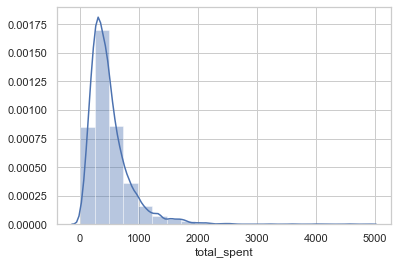

In [19]:
# histogram to show total_spent

sns.set_style('whitegrid')
sns.distplot(credit.total_spent,bins=20);

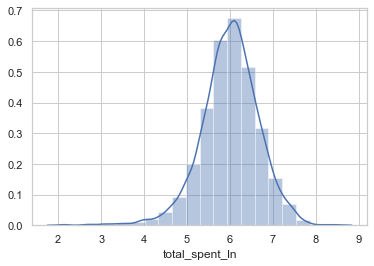

In [20]:
# as it is highly skewed we need to take log function.
credit['total_spent_ln']=np.log(credit['total_spent'])

sns.distplot(credit.total_spent_ln,bins=20);

In [21]:
#dropping variables
credit=credit.drop(columns=['total_spent','cardspent','card2spent'],axis=1)

#updating variable lists
cat_col=[col for col in cat_col if col in credit.columns]
cont_col=list(set(credit.columns)-set(cat_col))
print("Total Variables-{}\nCategoriacl-{}, Continuous-{}".format(credit.shape[1],len(cat_col),len(cont_col)))

Total Variables-128
Categoriacl-84, Continuous-44


In [22]:
# checking null values
credit.isnull().sum().where(lambda x:x>0).dropna()

townsize          2.0
lncreddebt        1.0
lnothdebt         1.0
commutetime       2.0
longten           3.0
lnlongten         3.0
lntollmon      2622.0
lntollten      2622.0
lnequipmon     3296.0
lnequipten     3296.0
lncardmon      1419.0
cardten           2.0
lncardten      1422.0
lnwiremon      3656.0
lnwireten      3656.0
dtype: float64

In [23]:
#inspecting variables where missing values are more than 25%
credit.isnull().sum().where(lambda x:x>0.25*credit.shape[0]).dropna()

lntollmon     2622.0
lntollten     2622.0
lnequipmon    3296.0
lnequipten    3296.0
lncardmon     1419.0
lncardten     1422.0
lnwiremon     3656.0
lnwireten     3656.0
dtype: float64

In [24]:
miss_cols_drop=credit.isnull().sum().where(lambda x:x>0.25*credit.shape[0]).dropna().index

#dropping variables
credit=credit.drop(columns=miss_cols_drop,axis=1)
credit.shape

#updating variable list
cat_col=[col for col in cat_col if col in credit.columns]
cont_col=list(set(credit.columns)-set(cat_col))
print("Total variables-{}\nCategoriacl-{} , Continuous-{}".format(credit.shape[1],len(cat_col),len(cont_col)))

Total variables-120
Categoriacl-84 , Continuous-36


<div style="background-color:#9ACD32;text-align:center;font-size: 200%"><strong><br>
Creating Data Audit Report
<br><br></strong></div>

### UDF  for both continous variables and categorical variables 


In [25]:
# for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


# for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

### Numerical variable summary

In [26]:
num_summary=credit[cont_col].apply(continuous_var_summary).T.round(1)
#num_summary.to_excel(writer,sheet_name = 'Numerical Variable Summary', index=True)
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
pets_saltfish,5000.0,0.0,233.0,0.0,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0
equipten,5000.0,0.0,2350882.0,470.2,0.0,912.2,832146.5,0.0,0.0,0.0,0.0,0.0,0.0,510.2,1912.3,2601.0,3679.5,6525.3
lnlongten,4997.0,3.0,28039.7,5.6,5.9,1.6,2.7,-0.1,0.9,2.5,3.3,4.7,5.9,6.8,7.5,7.9,8.5,9.5
longmon,5000.0,0.0,67357.2,13.5,9.6,12.8,163.2,0.9,1.8,2.9,3.7,5.7,9.6,16.6,27.0,36.8,65.2,179.8
pets_cats,5000.0,0.0,2502.0,0.5,0.0,0.9,0.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,6.0


### Categorical variable summary

In [27]:
categorical_summary=credit[cat_col].apply(categorical_var_summary).T
#categorical_summary.to_excel(writer,sheet_name = 'Categorical variable summary', index=True)
categorical_summary.head()

,N,NMISS,MODE,FREQ,PERCENT
active,5000,0,0,2670,53.4
address,5000,0,0,245,4.9
addresscat,5000,0,3,1221,24.42
agecat,5000,0,4,1222,24.44
bfast,5000,0,3,1875,37.5


<div style="background-color:#9ACD32;text-align:center;font-size: 200%"><strong><br>
Checking coorelations and other problems
<br><br></strong></div>


In [30]:
#plt.figure(figsize = (15, 12))
#matrix = np.triu(credit.corr())
#sns.heatmap(credit.corr(),cmap='coolwarm', mask=matrix);

In [37]:
thresold=0.85

print("--"*35)
print(f">> Feature-pairs having correlation coefficient more than {thresold*100}%")
print("--"*35)

high_corr_ser=credit.corr().unstack().sort_values().where(lambda x: (abs(x)>thresold)&(x!=1)).dropna()
#high_corr_ser
df_coeff=pd.DataFrame(high_corr_ser)
df_coeff=df_coeff.reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'correlation_coeff'})
df_coeff=df_coeff.iloc[::2].sort_values(by=['var1','var2']).reset_index(drop=True)
df_coeff

----------------------------------------------------------------------
>> Feature-pairs having correlation coefficient more than 85.0%
----------------------------------------------------------------------


,var1,var2,correlation_coeff
0,address,addresscat,0.923521
1,agecat,age,0.969879
2,card2tenure,card2tenurecat,0.924391
3,card2tenure,tenure,0.928240
4,cardmon,cardten,0.858591
5,cardtenure,card2tenure,0.962975
6,cardtenure,card2tenurecat,0.882880
7,cardtenure,cardtenurecat,0.865494
8,cardtenurecat,card2tenure,0.851267
9,cardtenurecat,card2tenurecat,0.924305


<div class='alert alert-warning'><strong>NOTE:</strong>
<br>Some highly correlated variables are:<br>'addresscat','agecat','cardtenurecat','card2tenurecat','cardtenure','commutecat','edcat','equipmon','inccat','lnlongten','longten','spoused','spousedcat','tenure','tollmon','wiremon'
<br><br>Now, we are dropping only numerical variables that are correlated, retaining categorical variables for dummy creation</div>

In [38]:
my_list=['addresscat','agecat','cardtenurecat','card2tenurecat','cardtenure','commutecat','edcat','equipmon', 'inccat',
         'lnlongten','longten','spoused','spousedcat','tenure','tollmon','wiremon']
drop_cols= [x for x in my_list if x in cont_col] #extracting numerica cols to drop
drop_cols

['equipmon', 'lnlongten', 'longten', 'spoused', 'tenure', 'tollmon', 'wiremon']

In [39]:
#list(set(my_list)-set(['equipmon', 'lnlongten', 'longten', 'spoused', 'tenure', 'tollmon', 'wiremon']))

In [40]:
#dropping columns
credit=credit.drop(columns=drop_cols,axis=1)

# updating variable lists
cat_col=[col for col in cat_col if col in credit.columns]
cont_col=list(set(credit.columns)-set(cat_col))
print("Total-{}\nCategoriacl-{}\nContinuous-{}".format(credit.shape[1],len(cat_col),len(cont_col)))

Total-113
Categoriacl-84
Continuous-29


<div style="background-color:#9ACD32;text-align:center;font-size: 200%"><strong><br>
Handling Outliers and Missing values
<br><br></strong></div>

In [41]:
#outlier  treatment

credit[cont_col]=credit[cont_col].apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), 
                                                                   upper = x.quantile(0.99)))

In [212]:
#credit.to_excel(writer,'Outlier_Treatment',index=True)

In [42]:
#checking columns with missing values
credit.isna().sum().where(lambda x:x>0).dropna()

townsize       2.0
lncreddebt     1.0
lnothdebt      1.0
commutetime    2.0
cardten        2.0
dtype: float64

In [43]:
# missing value imputation according to column-type
miss_cols2=credit.isna().sum().where(lambda x:x>0).dropna().index

for col in miss_cols2:
    if col in set(cat_col): 
        credit[col] = credit[col].fillna(credit[col].mode()[0])
    else:
        credit[col] = credit[col].fillna(credit[col].mean())

#check
credit.isna().sum().where(lambda x:x>0).dropna()

Series([], dtype: float64)

In [217]:
#credit.to_excel(writer,'Missing Value Treated',index=True)

<div style="background-color:#9ACD32;text-align:center;font-size: 200%"><strong><br>
Data-preparation-II
<br><br></strong></div>

<div class='alert alert-warning'><strong>NOTE:</strong>
    <br>1.<tt>'income','othdebt','creddebt'</tt>-- columns have their logarithm present in the dataset, so they are also dropped 
    <br>2. Months name are changed to month-serial no in <tt> 'birthmonth' </tt>column </div>

In [44]:
#dropping columns
#list_drop=['income','othdebt','creddebt']
credit=credit.drop(columns=['income','othdebt','creddebt'],axis=1)

# updating variable lists
cat_col=[col for col in cat_col if col in credit.columns]
cont_col=list(set(credit.columns)-set(cat_col))
print("Total-{}\nCategoriacl-{}\nContinuous-{}".format(credit.shape[1],len(cat_col),len(cont_col)))

Total-110
Categoriacl-84
Continuous-26


In [45]:
# 'birthmonth' column 

from time import strptime
def tomonth(month_name):
    month_number=strptime(month_name, '%B').tm_mon
    return month_number

credit['birthmonth']=credit['birthmonth'].map(lambda x: tomonth(x))

<div style="background-color:#9ACD32;text-align:center;font-size: 200%"><strong><br>
Dummy creation
<br><br></strong></div>

<div class='alert alert-warning'><strong>Steps to be followed are:</strong><br>
<br>>1. extracting only non-boolean columns  from categorical columns list for dummy-creation, as there is no use of creating dummies for those columns those are already boolean
<br>>2. adding their dummies into the main dataset
<br>>3. dropping those parent non-boolean columns after dummy is created
<br>>4. creating  a final merged dataset out of **continuous columns,boolean columns and dummy columns** for analysis.</div>


In [46]:
cat_col_bool=[]

for col in cat_col:
    if set(credit[col].unique())=={0,1}: 
        cat_col_bool.append(col)
        
cat_col_dummy=list(set(cat_col)-set(cat_col_bool))

dum_count=0
for col in cat_col_dummy:
        dum_count+= credit[col].nunique()-1
print(f"Total columns: {credit.shape[1]}") 
print(f"\nContinuous column: {len(cont_col)}")    
print(f"Categorical column: {len(cat_col)}\t-->boolean({len(cat_col_bool)})+ non-boolean({len(cat_col_dummy)})")
print("\nNo of dummies to be created: ", dum_count)
print("No of columns in final dataset should be: ",credit.shape[1]+dum_count-len(cat_col_dummy))

Total columns: 110

Continuous column: 26
Categorical column: 84	-->boolean(49)+ non-boolean(35)

No of dummies to be created:  307
No of columns in final dataset should be:  382


### List of non-boolean columns for dummy creation

In [50]:
cat_to_dum=['region', 'townsize','gender','agecat','edcat','empcat','inccat','jobsat','spousedcat',
         'hometype','addresscat','cars','carown','cartype','carcatvalue',
         'carbought','commutecat','reason','polview','card','cardtype','cardbenefit',
         'cardtenurecat','card2','card2type','card2benefit','card2tenurecat',
         'bfast','internet']

In [49]:
#checking dummy creation process
k='edcat'
pd.get_dummies(credit[k],prefix=k,drop_first=True).head()

,edcat_2,edcat_3,edcat_4,edcat_5
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


### UDF to create dummies, concatenating them to main dataframe, removing parent features

In [51]:
# UDF to create dummies, concatenating them to main dataframe, removing parent features
def create_dummy(df,colname):
    dummy_df=pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df=pd.concat([df,dummy_df],axis=1)
    df=df.drop(colname, axis=1)
    return df

In [52]:
credit.shape

(5000, 110)

In [53]:
for var in cat_to_dum:
    credit.loc[:,var]=credit_cat.loc[:,var].astype('category')
    credit=create_dummy(credit,var)

credit.shape

(5000, 187)

<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
Model Building
<br><br></strong></div>

<div style="background-color:#DAF7A6 ;font-size: 150%"><strong><br>
 Splitting the data  
<br><br></strong></div> 

In [55]:
feature_columns = credit.columns.difference( ['total_spent_ln'] )
train_X, test_X, train_y, test_y = train_test_split(credit[feature_columns],
                                                  credit['total_spent_ln'],
                                                  test_size=0.3,random_state=123)

In [56]:
print ("Total records: ",credit.shape[0])
print ("\nNo of records in train-set: ",len( train_X ))
print ("No of records in test-set: ",len( test_X))

Total records:  5000

No of records in train-set:  3500
No of records in test-set:  1500


<div style="background-color:#DAF7A6;font-size: 200%"><strong><br>
   Feature Selection using Random Forest Regression  
<br><br></strong></div>

In [58]:
param_grid={'n_estimators':np.arange(10,25)}

In [59]:
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_X,train_y)

GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])})

In [60]:
tree.best_params_

{'n_estimators': 23}

In [61]:
clf_rf = RandomForestRegressor(oob_score=True,n_estimators=21)
clf_rf.fit( train_X, train_y)

RandomForestRegressor(n_estimators=21, oob_score=True)

In [62]:
clf_rf.oob_score_

0.13917363799589832

In [63]:
ce=pd.DataFrame(clf_rf.feature_importances_, 
                index=train_X.columns, 
                columns={'Coefficients' : 0})

ce.sort_values('Coefficients',ascending=False,inplace=True)
#ce.to_csv('rf_feature_imp')
ce.head(10)

,Coefficients
lninc,0.199800
lncreddebt,0.031898
lnothdebt,0.028467
carvalue,0.026792
debtinc,0.024986
card_3,0.024918
commutetime,0.021214
hourstv,0.020820
cardmon,0.020552
card_2,0.019266


### Selecting Top 40 features

In [64]:
top_features=list(ce.index[0:40])
top_features

['lninc',
 'lncreddebt',
 'lnothdebt',
 'carvalue',
 'debtinc',
 'card_3',
 'commutetime',
 'hourstv',
 'cardmon',
 'card_2',
 'birthmonth',
 'card_4',
 'cardten',
 'ed',
 'age',
 'employ',
 'lnlongmon',
 'longmon',
 'reason_2',
 'pets',
 'address',
 'equipten',
 'tollten',
 'card2tenure',
 'cardtenure',
 'jobcat',
 'pets_freshfish',
 'commute',
 'card2_2',
 'card_5',
 'wireten',
 'reside',
 'pets_cats',
 'gender_1',
 'card2_3',
 'agecat_5',
 'pets_dogs',
 'carbuy',
 'polview_4',
 'cartype_0']

In [65]:
# Create data frame with selected features
top_features.append('total_spent_ln')

rf_df=credit[top_features]
rf_df.head()

,lninc,lncreddebt,lnothdebt,carvalue,debtinc,card_3,commutetime,hourstv,cardmon,card_2,...,reside,pets_cats,gender_1,card2_3,agecat_5,pets_dogs,carbuy,polview_4,cartype_0,total_spent_ln
0,3.433987,0.183079,0.806516,14.3,11.1,1,22.0,13,14.25,0,...,3,0,1,0,0,0,0,0,1,5.007029
1,2.708050,0.200505,0.449788,6.8,18.6,0,29.0,18,16.00,1,...,2,0,0,0,0,0,0,1,0,4.350794
2,3.555348,-0.074056,0.930738,18.8,9.9,0,24.0,21,23.00,1,...,3,2,1,0,0,1,1,0,0,5.886021
3,2.995732,-3.401690,0.110826,8.7,5.7,0,38.0,26,21.00,1,...,5,0,0,1,0,0,1,0,0,5.884464
4,3.135494,-1.538705,-1.735336,10.6,1.7,0,32.0,27,17.25,0,...,4,0,0,0,0,0,1,1,0,6.230147


<div style="background-color:#DAF7A6;font-size: 200%"><strong><br>
   Feature Selection using VIF 
<br><br></strong></div>

In [66]:
features=rf_df.drop('total_spent_ln',axis=1).columns

features_string = "+".join(features)
features_string

'lninc+lncreddebt+lnothdebt+carvalue+debtinc+card_3+commutetime+hourstv+cardmon+card_2+birthmonth+card_4+cardten+ed+age+employ+lnlongmon+longmon+reason_2+pets+address+equipten+tollten+card2tenure+cardtenure+jobcat+pets_freshfish+commute+card2_2+card_5+wireten+reside+pets_cats+gender_1+card2_3+agecat_5+pets_dogs+carbuy+polview_4+cartype_0'

In [67]:
y, X = dmatrices('total_spent_ln~ '+features_string,rf_df, return_type='dataframe')

# For each X, calculate VIF and save in the dataframe
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by=['VIF Factor']).reset_index(drop=True).head()

,features,VIF Factor
0,carbuy,1.005831
1,birthmonth,1.006355
2,polview_4,1.010758
3,commutetime,1.014764
4,gender_1,1.018905


In [69]:
thresold_vif=9.9
print(f">> Variables having VIF more than given thresold (>{thresold_vif}):")

drop_vars= vif[vif['VIF Factor']>thresold_vif].features	.tolist()
drop_vars.remove('Intercept')
drop_vars

>> Variables having VIF more than given thresold (>9.9):


['pets', 'card2tenure', 'cardtenure', 'pets_freshfish']

In [70]:
rf_df.shape

(5000, 41)

In [71]:
rf_df.drop(drop_vars,axis=1,inplace=True)
rf_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(5000, 37)

In [81]:
# selected variables 
#print(">> List of selected variables: \n\n",list(rf_df.columns))

In [93]:
feature_columns=rf_df.columns.difference(['total_spent_ln', 'pets_cats', 'reside', 'cardbenefit_3', 'pets_dogs','cardten',
                                           'lnothdebt', 'wireten', 'commute', 'birthmonth' , 'commutetime', 'debtinc',
                                          'hourstv', 'lnlongmon', 'longmon', 'tollten' , 'carvalue', 'employ', 'carbuy',
                                          'address','cardmon', 'internet_4', 'lncreddebt'
                                         ])
feature_columns

Index(['age', 'agecat_5', 'card2_2', 'card2_3', 'card_2', 'card_3', 'card_4',
       'card_5', 'cartype_0', 'ed', 'equipten', 'gender_1', 'jobcat', 'lninc',
       'polview_4', 'reason_2'],
      dtype='object')

In [92]:
for x in rf_df.columns:
    if x not in feature_columns: print(x,end=",")

lncreddebt,lnothdebt,carvalue,debtinc,commutetime,hourstv,cardmon,birthmonth,cardten,employ,lnlongmon,longmon,address,tollten,commute,wireten,reside,pets_cats,pets_dogs,carbuy,total_spent_ln,

# Linear Regression

In [94]:
train_X,test_X,train_y,test_y=train_test_split(rf_df[feature_columns],
                                              rf_df['total_spent_ln'],
                                               test_size=.25,
                                               random_state=123)

In [95]:
train_X = sm.add_constant(train_X)
test_X=sm.add_constant(test_X)
lm=sm.OLS(train_y,train_X).fit()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [96]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spent_ln   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          5.76e-293
Time:                        14:07:31   Log-Likelihood:                -3016.1
No. Observations:                3750   AIC:                             6066.
Df Residuals:                    3733   BIC:                             6172.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4355      0.075     72.948      0.0

In [261]:
#f=open('model Summary.csv','w')
#f.write(lm.summary().as_csv())
#f.write(lm.summary().as_latex())
#f.close()

In [97]:
lm.pvalues.sort_values(ascending=False)

cartype_0     5.736533e-01
agecat_5      4.386001e-01
polview_4     3.845723e-01
equipten      2.747512e-02
ed            2.314471e-03
jobcat        1.700924e-03
gender_1      2.888036e-04
age           2.604538e-04
card2_3       5.212900e-11
card2_2       2.338873e-12
reason_2      6.480719e-16
card_5        8.019036e-18
card_2        3.186995e-67
card_3        1.073073e-69
card_4        3.240503e-80
lninc        7.827903e-149
const         0.000000e+00
dtype: float64

In [98]:
print('Parameters:', lm.params) 
print('R2: ', lm.rsquared)

Parameters: const        5.435531
age         -0.001941
agecat_5    -0.017871
card2_2     -0.161165
card2_3     -0.148989
card_2      -0.501448
card_3      -0.509170
card_4      -0.522569
card_5      -0.410294
cartype_0   -0.010016
ed          -0.009469
equipten     0.000024
gender_1    -0.064571
jobcat      -0.016175
lninc        0.363768
polview_4   -0.016256
reason_2     0.292910
dtype: float64
R2:  0.3160632716284155


In [101]:
test_pred=lm.predict(test_X)
train_pred=lm.predict(train_X)

print('>> MSE: \nTest = {}, Train = {}'.format(round(metrics.mean_squared_error(test_y,test_pred),4),
                                       round(metrics.mean_squared_error(train_y,train_pred),4)
                                      ))

print ('\n>> MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('\n>> RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

>> MSE: 
Test = 0.2755, Train = 0.2925

>> MAE: 0.4122626202154761

>> RMSE: 0.5248575062333081


### Plotting Residuals

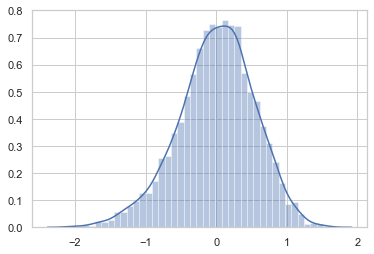

In [102]:
residuals=train_y-train_pred
sns.distplot(residuals);

In [103]:
rf_df=rf_df[feature_columns]
rf_df=sm.add_constant(rf_df)
rf_df.head()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,agecat_5,card2_2,card2_3,card_2,card_3,card_4,card_5,cartype_0,ed,equipten,gender_1,jobcat,lninc,polview_4,reason_2
0,1.0,20,0,0,0,0,1,0,0,1,15,126.1,1,1,3.433987,0,0
1,1.0,22,0,0,0,1,0,0,0,0,17,1975.0,0,2,2.708050,1,0
2,1.0,67,0,0,0,1,0,0,0,0,14,0.0,1,2,3.555348,0,1
3,1.0,23,0,0,1,1,0,0,0,0,16,0.0,0,2,2.995732,0,0
4,1.0,26,0,0,0,0,0,1,0,0,16,0.0,0,2,3.135494,1,0


<div style="background-color:#DAF7A6;font-size: 200%"><strong><br>
   Final Prediction  
<br><br></strong></div>

In [112]:
pred_total_spend= pd.DataFrame(np.exp(lm.predict(rf_df)), columns= {"pred_tot_spend": 0})
pred_total_spend.head()

,pred_tot_spend
0,367.576364
1,303.119819
2,473.794845
3,283.254502
4,331.283986


In [113]:
credit_original=pd.read_excel('Data Set.xlsx')

In [114]:
#Adding final prediction column to original test file
Prediction_final = pd.concat([credit_original, pred_total_spend], axis=1)
Prediction_final.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,pred_tot_spend
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,1,1,0,0,0,1,0,367.576364
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,0,0,0,303.119819
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,0,0,0,0,0,1,0,0,0,473.794845
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,0,1,1,1,0,1,1,0,0,283.254502
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,0,1,0,1,0,0,0,1,0,331.283986


In [158]:
#Submission.to_excel(writer, "Predictions", index=True)
#Submission.to_csv("Predictions")

<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
   Decile Analysis 
<br><br></strong></div>

### Constructing train-test dataset for analysis

In [107]:
#constructing train-dataset
train=pd.concat([train_X,train_y],axis=1)
train=sm.add_constant(train)
train['pred_tot_spend'] = lm.predict(train_X)

#constructing test-dataset
test=pd.concat([test_X,test_y],axis=1)
test=sm.add_constant(test)
test['pred_tot_spend'] = lm.predict(test_X)

### Creating 10 Groups in the data

In [108]:
#train data
train['Deciles'] = pd.qcut(train['pred_tot_spend'], 10, labels = False)
#test data
test['Deciles'] = pd.qcut(test['pred_tot_spend'], 10, labels = False)

In [109]:
train.head()

,const,age,agecat_5,card2_2,card2_3,card_2,card_3,card_4,card_5,cartype_0,ed,equipten,gender_1,jobcat,lninc,polview_4,reason_2,total_spent_ln,pred_tot_spend,Deciles
2413,1.0,20,0,0,0,0,0,0,0,0,12,0.00,1,5,2.995732,1,0,6.439382,6.211131,7
1471,1.0,61,1,0,0,0,0,1,0,0,15,0.00,1,1,3.828641,0,0,5.545256,5.946640,4
1196,1.0,66,0,0,1,0,0,1,0,1,20,849.05,0,3,2.564949,1,0,5.371800,5.325033,0
1509,1.0,23,0,1,0,0,0,0,0,0,12,0.00,0,6,3.332205,0,1,5.775669,6.524105,9
4110,1.0,47,0,0,1,1,0,0,0,0,9,689.60,0,1,3.496508,0,0,5.759312,5.880874,4


### Decile Analysis

In [138]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_tot_spend']].groupby(train.Deciles).mean()\
                                                    .sort_index(ascending = False)['pred_tot_spend']
Actual_avg = train[['Deciles', 'total_spent_ln']].groupby(train.Deciles).mean()\
                                                .sort_index(ascending = False)['total_spent_ln']

Decile_analysis_train= pd.concat([Predicted_avg, Actual_avg], axis = 1).sort_index().reset_index()
Decile_analysis_train

,Deciles,pred_tot_spend,total_spent_ln
0,0,5.426379,5.375524
1,1,5.633925,5.694611
2,2,5.738301,5.743768
3,3,5.822125,5.761648
4,4,5.904113,5.940911
5,5,5.994937,6.027145
6,6,6.098949,6.084367
7,7,6.207741,6.195451
8,8,6.390550,6.424642
9,9,6.721554,6.690508


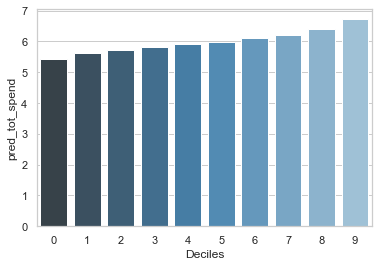

In [140]:
sns.barplot(x='Deciles',y='pred_tot_spend',data=Decile_analysis_train,palette="Blues_d");

In [145]:
# Decile Analysis for test data
Predicted_avg = test[['Deciles', 'pred_tot_spend']].groupby(test.Deciles).mean()\
                                                    .sort_index(ascending = False)['pred_tot_spend']
Actual_avg = test[['Deciles', 'total_spent_ln']].groupby(test.Deciles).mean()\
                                                .sort_index(ascending = False)['total_spent_ln']

Decile_analysis_test= pd.concat([Predicted_avg, Actual_avg], axis = 1).sort_index().reset_index()
Decile_analysis_test

,Deciles,pred_tot_spend,total_spent_ln
0,0,5.451268,5.481640
1,1,5.662991,5.708967
2,2,5.771499,5.829127
3,3,5.861251,5.819028
4,4,5.957862,6.011981
5,5,6.050157,6.158676
6,6,6.144460,6.149650
7,7,6.250022,6.235630
8,8,6.399171,6.343932
9,9,6.699818,6.634714


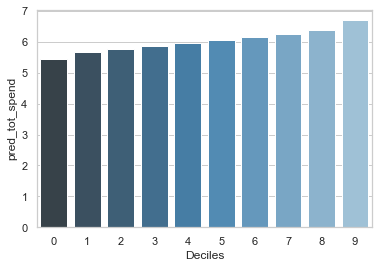

In [146]:
sns.barplot(x='Deciles',y='pred_tot_spend',data=Decile_analysis_test,palette="Blues_d");

In [ ]:
#Decile_analysis_train.to_csv('Decile_analysis_train')
#Decile_analysis_train.to_excel(writer, 'Decile_train', index=True)

#Decile_analysis_test.to_csv('Decile_analysis_test')
#Decile_analysis_test.to_excel(writer,'Decile_analysis_test', index=True)

In [163]:
#writer.save()

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
   Key driving factors of credit card spend 
<br><br></strong></div>

In [121]:
ce.head()

,Coefficients
lninc,0.199800
lncreddebt,0.031898
lnothdebt,0.028467
carvalue,0.026792
debtinc,0.024986


In [122]:
ce.shape

(186, 1)

In [141]:
key_df=ce.sort_values('Coefficients',ascending=False)
#key_df.head(20).index

## Finding top 20 Key driving factors

In [133]:
keys=set()
for x in key_df.head(20).index:  
    keys.add(x.split("_")[0])

keys

{'age',
 'birthmonth',
 'card',
 'cardmon',
 'cardten',
 'carvalue',
 'commutetime',
 'debtinc',
 'ed',
 'employ',
 'hourstv',
 'lncreddebt',
 'lninc',
 'lnlongmon',
 'lnothdebt',
 'longmon',
 'pets',
 'reason'}

In [ ]:
#n=5

#ce.head(n).Coefficients.plot(kind='bar',figsize=(10,5))
#plt.title('Top {} key-drivers for predicting Credit Card Spending of customers\n'.format(n), fontsize=15);